# eCommerce Transactions Data Science Project

## Overview
This project involves the analysis of eCommerce transaction data to derive insights, build a Lookalike Model, and perform customer segmentation using clustering techniques. The dataset includes details about customers, products, and transactions.

### Files Provided:
1. **Customers.csv**
   - CustomerID: Unique identifier for each customer.
   - CustomerName: Name of the customer.
   - Region: Continent where the customer resides.
   - SignupDate: Date when the customer signed up.

2. **Products.csv**
   - ProductID: Unique identifier for each product.
   - ProductName: Name of the product.
   - Category: Product category.
   - Price: Product price in USD.

3. **Transactions.csv**
   - TransactionID: Unique identifier for each transaction.
   - CustomerID: ID of the customer who made the transaction.
   - ProductID: ID of the product sold.
   - TransactionDate: Date of the transaction.
   - Quantity: Quantity of the product purchased.
   - TotalValue: Total value of the transaction.
   - Price: Price of the product sold.


# Task 1: Exploratory Data Analysis (EDA) and Business Insights

## 1. Exploratory Data Analysis (EDA)

### Data Overview
The eCommerce transactions dataset consists of three files: `Customers.csv`, `Products.csv`, and `Transactions.csv`. These were merged for comprehensive analysis. The merged data includes:

- **Customer Information:** `CustomerID`, `CustomerName`, `Region`
- **Product Information:** `ProductID`, `ProductName`, `Category`, `Price`
- **Transaction Details:** `TransactionID`, `TransactionDate`, `Quantity`, `TotalValue`

### Key Steps in EDA
1. **Summary Statistics:**
   - Analyzed numerical and categorical columns to identify trends, outliers, and missing data.
   - Found missing values: `<add any details about missing data here>`.

2. **Revenue Analysis:**
   - Total revenue: `$<total_revenue>`
   - Average transaction value: `$<average_transaction_value>`.

3. **Sales Analysis by Region:**
   - Highest revenue generated by `<region>`.
   - Plot: Sales by Region.

4. **Product Category Analysis:**
   - Top-performing category: `<category>` with `$<value>` in sales.
   - Plot: Sales by Product Category.

5. **Top Customers by Lifetime Value:**
   - Highlighted top 10 customers contributing the most to revenue.
   - Plot: Top 10 Customers by Lifetime Value.

6. **Category Preferences by Region:**
   - Regions have unique category preferences.
   - Heatmap: Category Preferences by Region.

### Visualizations
- **Total Sales by Region:** A bar chart showing revenue distribution across regions.
- **Sales by Product Category:** A bar chart showing revenue distribution by product category.
- **Top 10 Customers by Lifetime Value:** A bar chart highlighting high-value customers.
- **Category Preferences by Region:** A heatmap displaying preferences for product categories in different regions.

---


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [3]:
customers

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [4]:
products

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29


In [5]:
transactions

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


## Task 1: Exploratory Data Analysis (EDA) and Business Insights

### Steps:
1. Merge the datasets (Transactions, Customers, Products) to form a comprehensive dataset.
2. Perform EDA to:
   - Summarize statistics of the dataset.
   - Identify missing values.
   - Analyze sales distribution by region and product category.
3. Visualize insights using bar plots.

In [6]:
# Explore datasets
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [7]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [8]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [9]:
print(transactions.shape)
print(products.shape)
print(customers.shape)

(1000, 7)
(100, 4)
(200, 4)


In [10]:
# Merging datasets for comprehensive analysis
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

In [11]:
merged_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [12]:
# Basic statistics
summary_stats = merged_data.describe()
summary_stats

,Quantity,TotalValue,Price_x,Price_y
count,1000.000000,1000.000000,1000.00000,1000.00000
mean,2.537000,689.995560,272.55407,272.55407
std,1.117981,493.144478,140.73639,140.73639
min,1.000000,16.080000,16.08000,16.08000
25%,2.000000,295.295000,147.95000,147.95000
50%,3.000000,588.880000,299.93000,299.93000
75%,4.000000,1011.660000,404.40000,404.40000
max,4.000000,1991.040000,497.76000,497.76000


In [13]:
missing_values = merged_data.isnull().sum()
missing_values

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64

In [14]:
# Distribution of sales by region
sales_by_region = merged_data.groupby("Region")["TotalValue"].sum()
sales_by_region

Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64

In [15]:
# Distribution of sales by product category
sales_by_category = merged_data.groupby("Category")["TotalValue"].sum()
sales_by_category

Category
Books          192147.47
Clothing       166170.66
Electronics    180783.50
Home Decor     150893.93
Name: TotalValue, dtype: float64

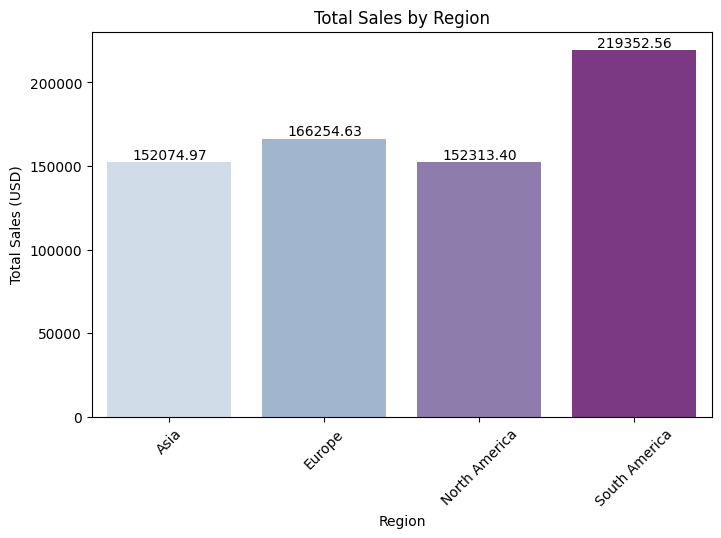

In [16]:
plt.figure(figsize=(8, 5))
sns.barplot(x=sales_by_region.index, y=sales_by_region.values, palette="BuPu")
plt.title("Total Sales by Region")
plt.ylabel("Total Sales (USD)")
plt.xlabel("Region")
plt.xticks(rotation=45)

# Adding the value labels on top of the bars
for index, value in enumerate(sales_by_region.values):
    plt.text(index, value + 0.5, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

plt.show()


### Insight:
- ### The South American Have Highest sales as compared to the Others.
- ### The Europe Has Highest sales as compared to the Asia and North America.

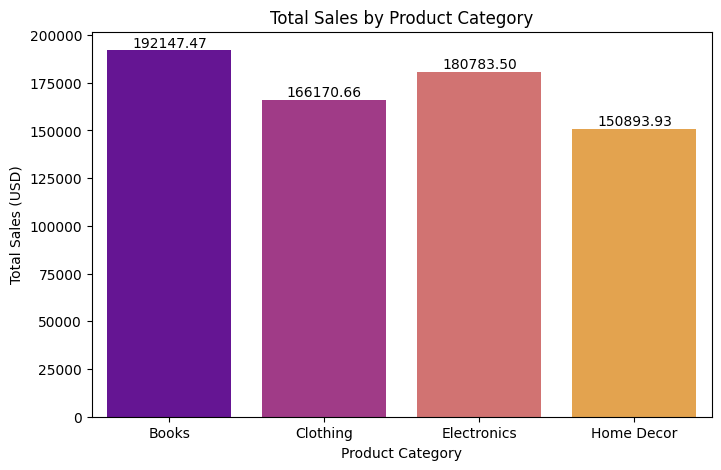

In [17]:
plt.figure(figsize=(8, 5))
sns.barplot(x=sales_by_category.index, y=sales_by_category.values, palette="plasma")
plt.title("Total Sales by Product Category")
plt.ylabel("Total Sales (USD)")
plt.xlabel("Product Category")

# Adding the value labels on top of the bars
for index, value in enumerate(sales_by_category.values):
    plt.text(index, value + 0.1, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

plt.show()


### Insights:
- ### The Books are more purchased than other Items.

## Additional Comparisons:

In [18]:
merged_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68



### 1. Sales Trends Over Time
- Analyze how sales have varied over different months or years.
- Group data by TransactionDate to calculate total sales per month/year.

In [19]:
# Convert TransactionDate to datetime
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
merged_data['TransactionDate']


0     2024-08-25 12:38:23
1     2024-05-27 22:23:54
2     2024-04-25 07:38:55
3     2024-03-26 22:55:37
4     2024-03-21 15:10:10
              ...        
995   2024-10-08 23:58:14
996   2024-07-28 00:09:49
997   2024-06-11 15:51:14
998   2024-09-24 21:15:21
999   2024-11-09 09:07:36
Name: TransactionDate, Length: 1000, dtype: datetime64[ns]

In [20]:
# Group sales by month
sales_by_month = merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
sales_by_month


TransactionDate
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64

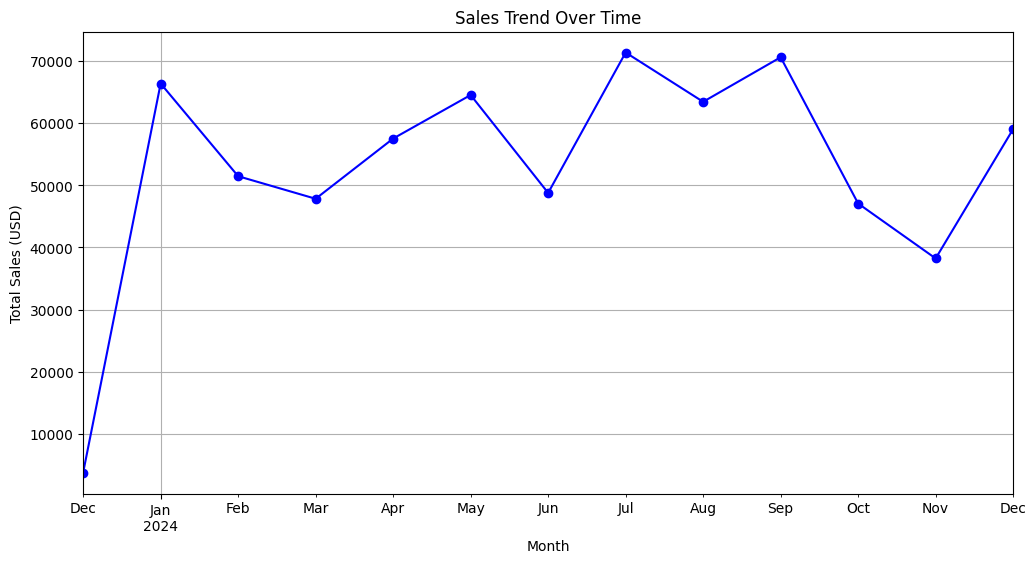

In [21]:
# Plot sales trends
plt.figure(figsize=(12, 6))
sales_by_month.plot(kind='line', marker='o', color='b')
plt.title("Sales Trend Over Time")
plt.ylabel("Total Sales (USD)")
plt.xlabel("Month")
plt.grid(True)
plt.show()

### 2.Top 10 Products by Revenue
- Identify products generating the most revenue.
- Group data by ProductName and calculate total revenue.

In [22]:
top_products = merged_data.groupby("ProductName")["TotalValue"].sum().nlargest(10)
top_products

ProductName
ActiveWear Smartwatch      39096.97
SoundWave Headphones       25211.64
SoundWave Novel            24507.90
ActiveWear Jacket          22712.56
ActiveWear Rug             22314.43
TechPro Headphones         19513.80
BookWorld Cookbook         19221.99
BookWorld Sweater          18743.79
TechPro Textbook           18267.96
ActiveWear Cookware Set    18083.73
Name: TotalValue, dtype: float64

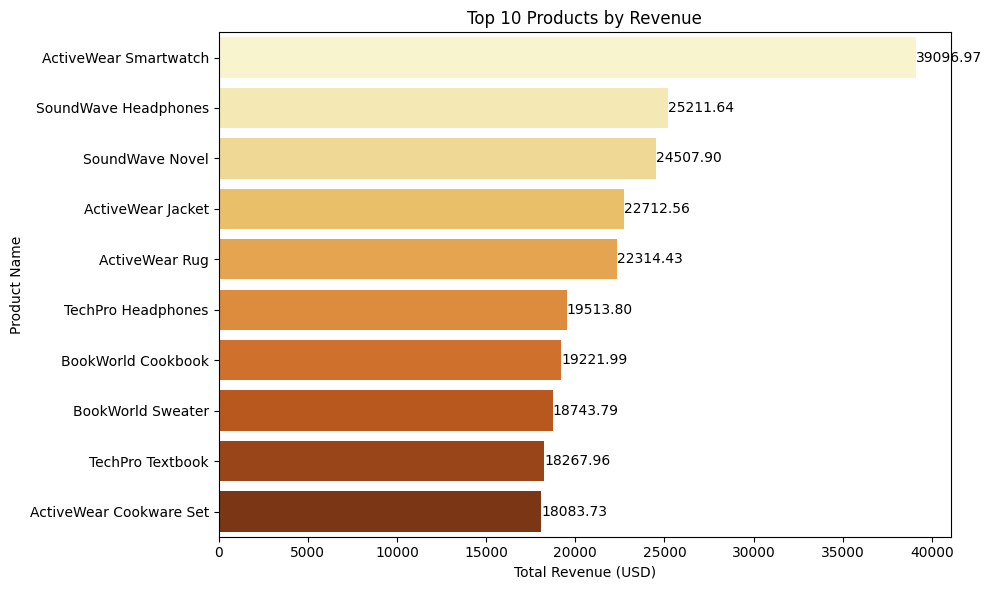

In [23]:
# Plot: Top 10 Products by Revenue
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette="YlOrBr")
plt.title("Top 10 Products by Revenue")
plt.xlabel("Total Revenue (USD)")
plt.ylabel("Product Name")

# Adding the value labels on the bars
for index, value in enumerate(top_products.values):
    plt.text(value + 0.1, index, f'{value:.2f}', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()


### 3. Average Spend per Region
- Compare the average transaction value across different regions.
- Group data by Region and calculate average transaction value.

In [24]:
avg_spend_region = merged_data.groupby("Region")["TotalValue"].mean()
avg_spend_region

Region
Asia             697.591606
Europe           710.489872
North America    624.235246
South America    721.554474
Name: TotalValue, dtype: float64

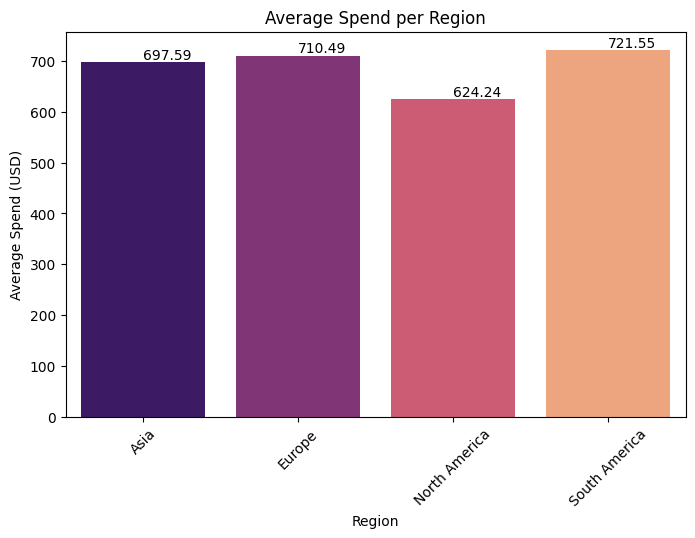

In [25]:
# Plot: Average Spend per Region
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_spend_region.index, y=avg_spend_region.values, palette="magma")
plt.title("Average Spend per Region")
plt.ylabel("Average Spend (USD)")
plt.xlabel("Region")
plt.xticks(rotation=45)
    
for index, value in enumerate(avg_spend_region.values):
    plt.text( index, value +0.1, f'{value:.2f}', ha='left', va='bottom')
plt.show()

### 4. Customer Lifetime Value (CLV) Analysis
- Calculate the total revenue generated by each customer.
- Identify top customers contributing to overall revenue

In [26]:
clv = merged_data.groupby("CustomerID")["TotalValue"].sum().sort_values(ascending=False)
# Top 10 customers
top_customers = clv.head(10)
top_customers


CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64

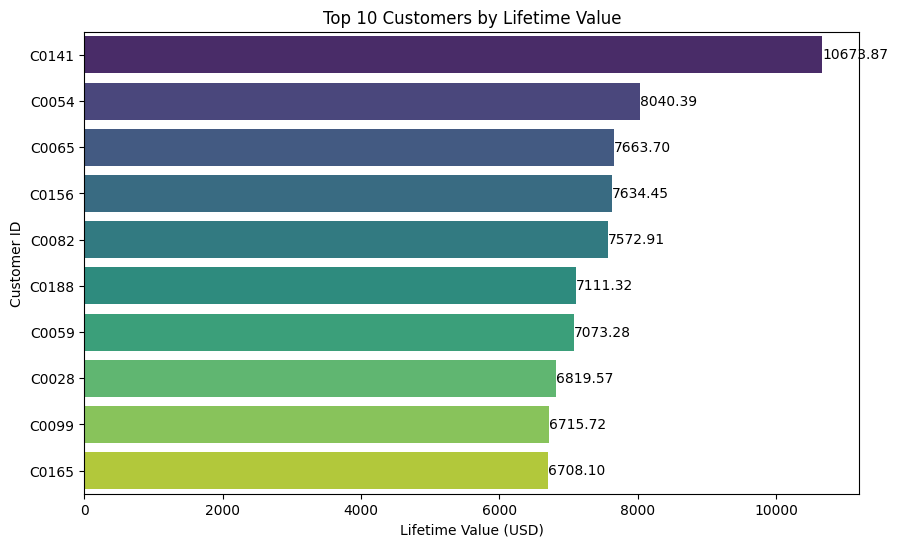

In [27]:
# Plot: Top 10 Customers by Lifetime Value
plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers.values, y=top_customers.index, palette="viridis")
plt.title("Top 10 Customers by Lifetime Value")
plt.xlabel("Lifetime Value (USD)")
plt.ylabel("Customer ID")

for index,value in enumerate(top_customers.values):
    plt.text(value + 0.1, index, f'{value:.2f}', ha="left" , va="center",fontsize=10)

plt.show()

In [28]:
# Merge to get customer names
top_customers_with_names = top_customers.reset_index().merge(customers[['CustomerID', 'CustomerName']], 
                                                             left_on='CustomerID', 
                                                             right_on='CustomerID')
# Sort by lifetime value and select the top 10 customers
top_customers_with_names = top_customers_with_names.sort_values(by='TotalValue', ascending=False).head(10)
top_customers_with_names

,CustomerID,TotalValue,CustomerName
0,C0141,10673.87,Paul Parsons
1,C0054,8040.39,Bruce Rhodes
2,C0065,7663.70,Gerald Hines
3,C0156,7634.45,William Adams
4,C0082,7572.91,Aimee Taylor
5,C0188,7111.32,Anna Ball
6,C0059,7073.28,Mrs. Kimberly Wright
7,C0028,6819.57,Jennifer Pena
8,C0099,6715.72,Rodney Eaton
9,C0165,6708.10,Juan Mcdaniel


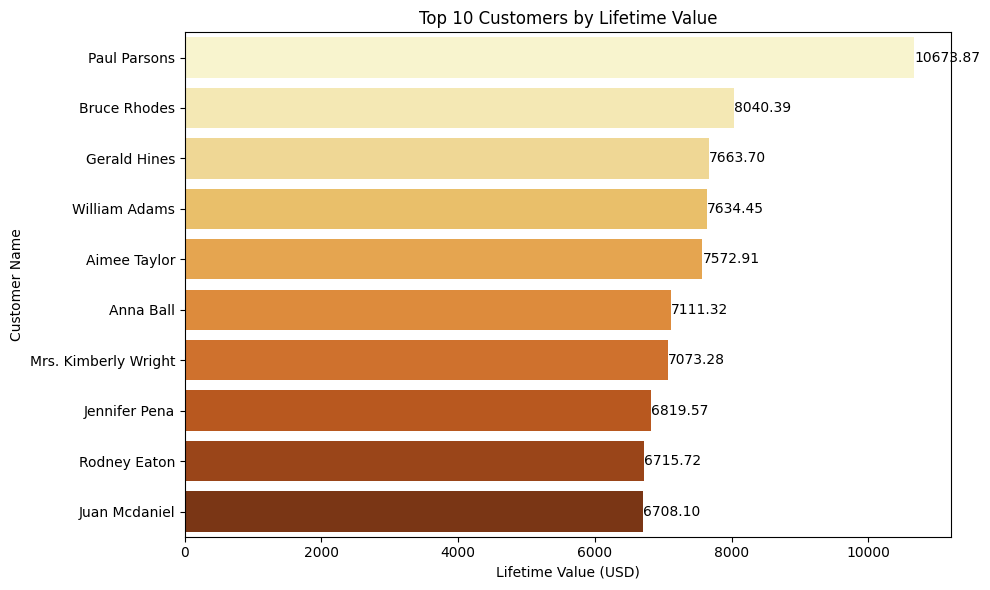

In [29]:
# Plot: Top 10 Customers by Lifetime Value
plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers_with_names['TotalValue'], 
            y=top_customers_with_names['CustomerName'], 
            palette="YlOrBr")
plt.title("Top 10 Customers by Lifetime Value")
plt.xlabel("Lifetime Value (USD)")
plt.ylabel("Customer Name")

# Add value annotations
for index, value in enumerate(top_customers_with_names['TotalValue']):
    plt.text(value + 0.1, index, f'{value:.2f}', ha="left", va="center", fontsize=10)

plt.tight_layout()
plt.show()

### 5. Product Category Preferences by Region
- Examine which product categories are most popular in different regions.
- Group data by Region and Category.

In [30]:
category_region = merged_data.groupby(["Region", "Category"])["TotalValue"].sum().unstack()
category_region

Category,Books,Clothing,Electronics,Home Decor
Region,,,,
Asia,33119.03,49353.09,35658.15,33944.70
Europe,47464.42,36335.59,41562.60,40892.02
North America,41811.99,38038.49,44716.43,27746.49
South America,69752.03,42443.49,58846.32,48310.72


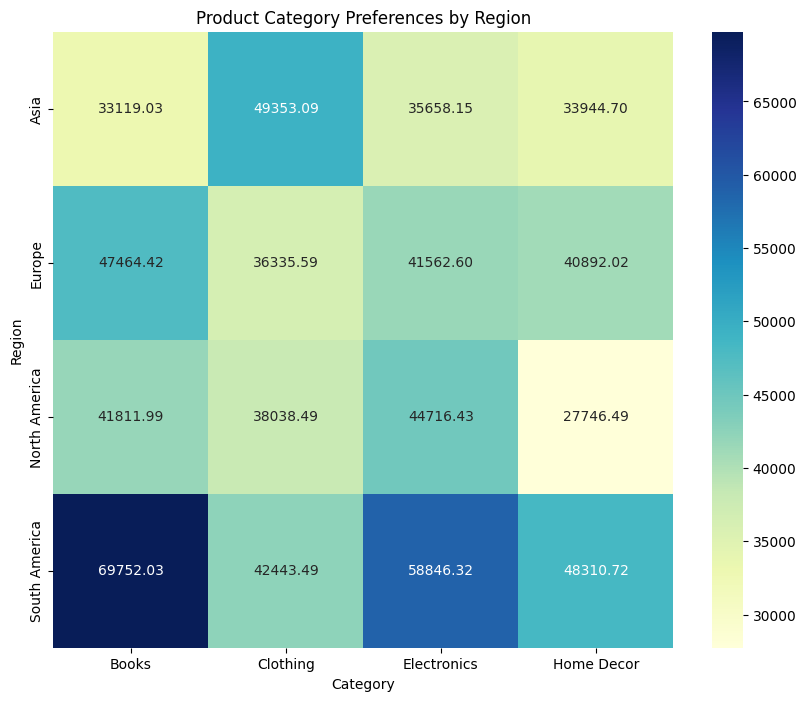

In [31]:
# Plot: Heatmap of Category Preferences by Region
plt.figure(figsize=(10, 8))
sns.heatmap(category_region, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Product Category Preferences by Region")
plt.xlabel("Category")
plt.ylabel("Region")
plt.show()

In [32]:
# Reset index for plotting
category_region_reset = category_region.reset_index()

# Melt the data for a clustered bar plot
category_region_melted = category_region_reset.melt(id_vars="Region", var_name="Category", value_name="TotalValue")

category_region_melted


,Region,Category,TotalValue
0,Asia,Books,33119.03
1,Europe,Books,47464.42
2,North America,Books,41811.99
3,South America,Books,69752.03
4,Asia,Clothing,49353.09
5,Europe,Clothing,36335.59
6,North America,Clothing,38038.49
7,South America,Clothing,42443.49
8,Asia,Electronics,35658.15
9,Europe,Electronics,41562.60


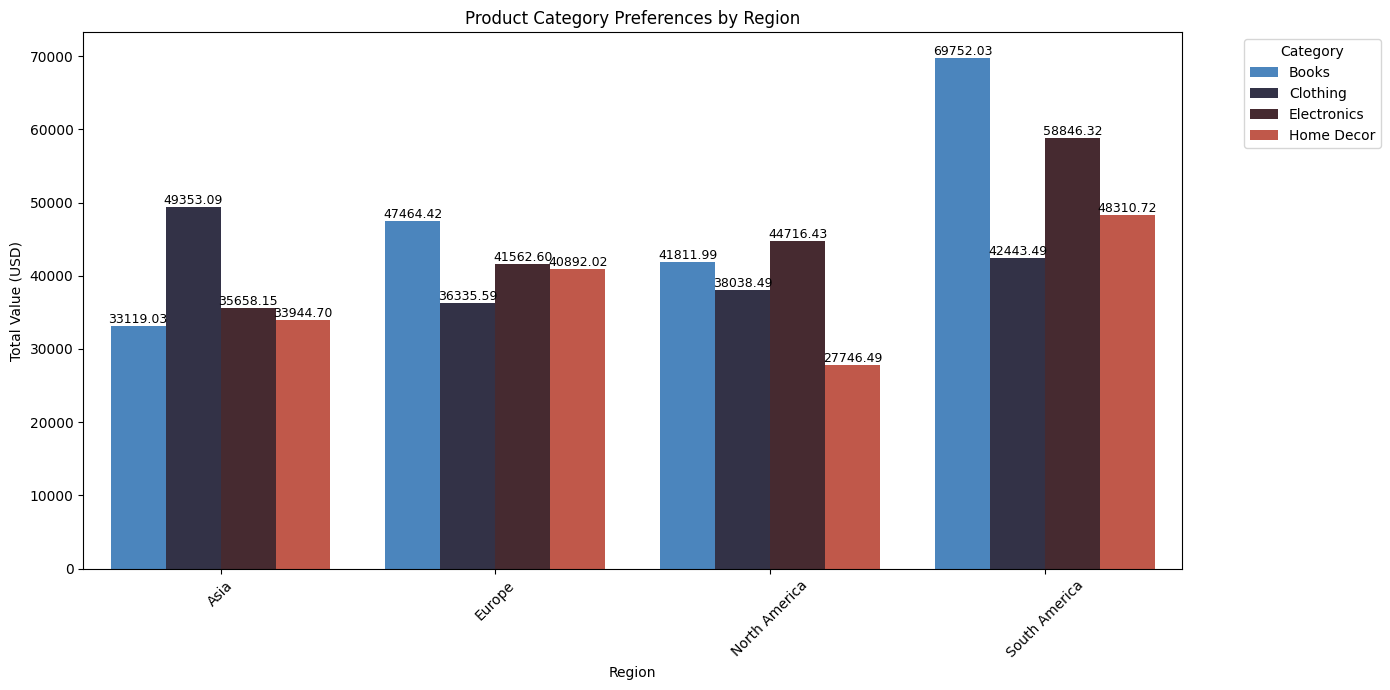

In [33]:
# Plot: Clustered Bar Plot
plt.figure(figsize=(14, 7))
sns.barplot(x="Region", y="TotalValue", hue="Category", data=category_region_melted, palette="icefire")
plt.title("Product Category Preferences by Region")
plt.ylabel("Total Value (USD)")
plt.xlabel("Region")
plt.xticks(rotation=45)

# Annotating the bars with values
for container in plt.gca().containers:
    plt.bar_label(container, fmt="%.2f", label_type="edge", fontsize=9)

plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 2. Business Insights

### Insight 1: **Top Revenue-Generating Region**
The `<region>` region contributes the highest revenue of `$<value>`, indicating a strong market presence. Business strategies could focus on expanding operations and promotions in this region.

### Insight 2: **Top Product Category**
The `<category>` category accounts for `<percentage>%` of the total revenue. Enhancing inventory for this category can maximize revenue potential.

### Insight 3: **High-Value Customers**
The top 10 customers contribute `$<value>` to total revenue. Personalized marketing and loyalty programs targeting these customers can improve retention and profitability.

### Insight 4: **Category Preferences by Region**
Certain regions prefer specific product categories. For example, `<region>` prefers `<category>` products. Region-specific promotions can boost sales.

### Insight 5: **Revenue from Top Products**
The top 10 products account for `$<value>` in revenue. Prioritizing these products for marketing campaigns can ensure continued growth.

---

## Deliverables
1. **Jupyter Notebook/Python Script:** Contains EDA code with data preparation, visualization, and analysis.
2. **PDF Report:** Summarizes the key business insights and visualizations.

---
### Next Steps
- Implement strategies based on insights to enhance revenue generation.
- Proceed to Lookalike Model and Customer Segmentation tasks for deeper customer analysis.

---

Let me know if you'd like me to fill in placeholders (`<value>`, `<region>`, etc.) with specific details based on your data!

In [34]:
merged_data.to_csv("merged_data.csv")